# <h1>import all dependencies<h1>

In [ ]:
#Importing Dependencies

import pandas as pd # for data manipulation
import numpy as np # deal with numerical data
import matplotlib.pyplot as plt # for the visulaization
import seaborn as sns # it's also for the visulaizaton

from sklearn.model_selection import train_test_split # split he data set for train and set

import warnings # inform you about upcoming changes to default values for arguments in the scikit-learn API.
warnings.filterwarnings('ignore')

<h1>Read Data</h1>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset

custData = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
# find the information about the dataset
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# find the shape of dataset
custData.shape

(614, 13)

In [ ]:
# use the statical analysis
custData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Target Distribution
custData['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

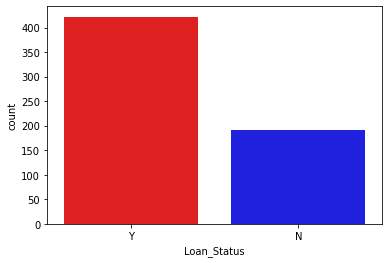

In [ ]:
# check the status for the loan
sns.countplot(x='Loan_Status', data=custData,palette=["red", "blue"]);

In [ ]:
# check the history
custData['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#the  ffill() method replaces the NULL values with the value from the previous row (or previous column
custData['Credit_History'].fillna(method='ffill',inplace=True) 
custData['Credit_History'].isna().values.any()

False

In [ ]:
#fill the missing value with median.
loan_term_median = custData['Loan_Amount_Term'].median()
custData['Loan_Amount_Term'].fillna(loan_term_median,inplace=True)
custData['Loan_Amount_Term'].isna().values.any()

False

In [ ]:
#fill the missing value with the median
loan_amt_median = custData['LoanAmount'].median()
custData['LoanAmount'].fillna(loan_amt_median,inplace=True)
custData['LoanAmount'].isna().values.any()

False

In [ ]:
# count the value of self employee
custData['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#Fill with Mode
custData['Self_Employed'].fillna('No',inplace=True)
custData['Self_Employed'].isna().values.any()

False

In [ ]:
dep = custData['Dependents'].mode()
custData['Dependents'].fillna('0',inplace=True)
custData['Dependents'].isna().values.any()

False

In [ ]:
custData['Married'].fillna('No',inplace=True)
custData['Married'].isna().values.any()

False

In [ ]:
gend = custData['Gender'].value_counts()
gend

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
custData['Gender'].fillna('Male',inplace=True)
custData['Gender'].isna().values.any()

False

In [ ]:
#After filling value once again check the null value.
custData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

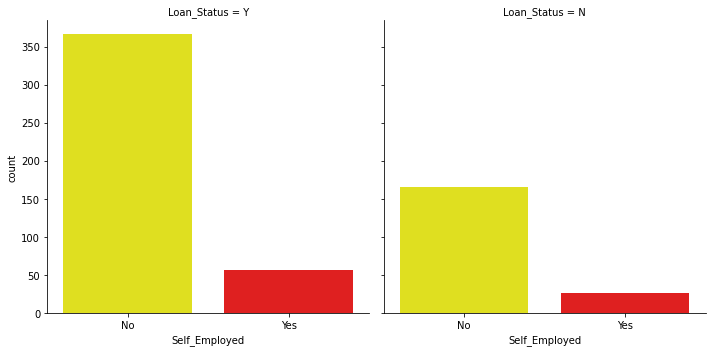

In [ ]:

sns.catplot(x='Self_Employed', col='Loan_Status', kind='count', data=custData, palette=["yellow", "red"]);

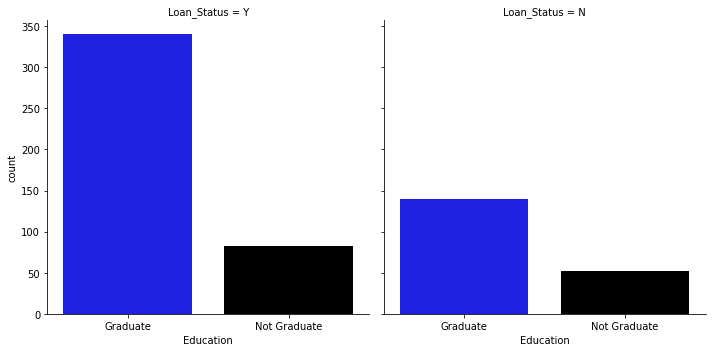

In [ ]:
sns.catplot(x='Education', col='Loan_Status', kind='count', data=custData, palette=["blue", "black"]);

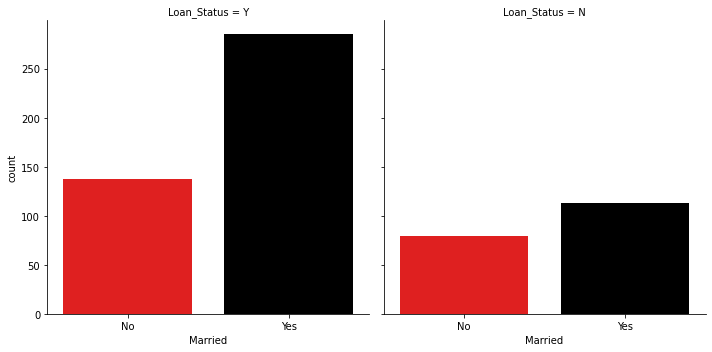

In [ ]:
sns.catplot(x='Married', col='Loan_Status', kind='count', data=custData, palette=["red", "black"]);

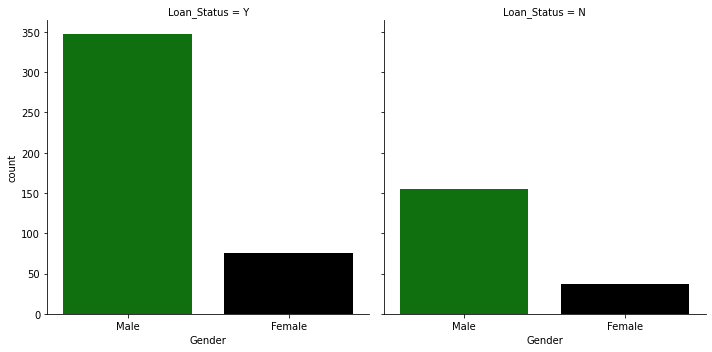

In [ ]:
sns.catplot(x='Gender', col='Loan_Status', kind='count', data=custData, palette=["green", "black"]);

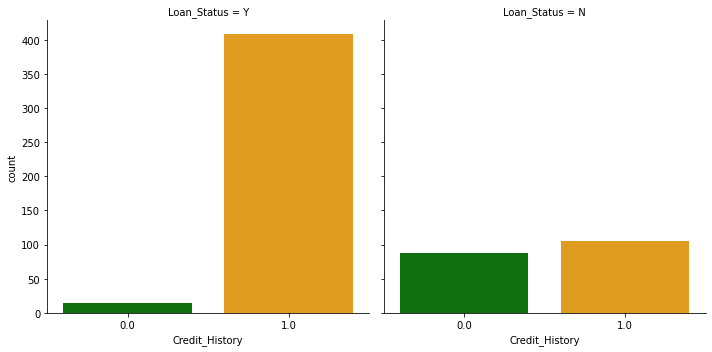

In [ ]:
#By Credit History
sns.catplot(x='Credit_History', col='Loan_Status', kind='count', data=custData, palette=["green", "orange"]);

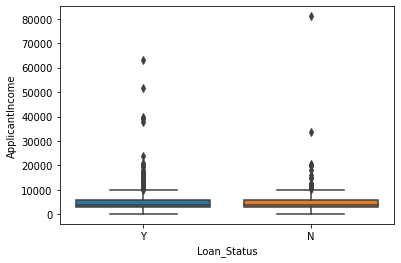

In [ ]:
sns.boxplot(x=custData['Loan_Status'], y=custData['ApplicantIncome']);

In [ ]:
#Encode Categorical Data
#custData.dtypes
from sklearn.preprocessing import LabelEncoder

categ_fields = custData.select_dtypes(include = "object").columns

lblEnc = LabelEncoder()

for feature in categ_fields:
    custData[feature] = lblEnc.fit_transform(custData[feature].astype(str))

#print (custData.info())

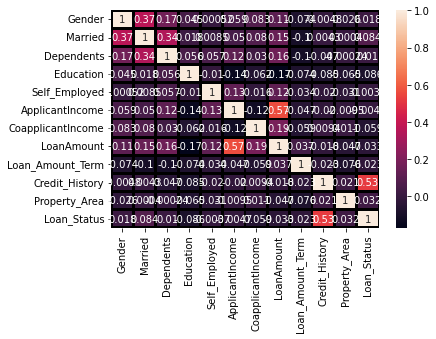

In [ ]:
#plt.rcParams['figure.figsize'] = (10, 8)
#Now check the correlation among the features
corr = custData.iloc[:,1:].corr() #Remove LoanID
cmap = sns.diverging_palette(220, 10, as_cmap=False)
sns.heatmap(corr, annot=True, linewidths=1.7, linecolor='black');
#plt.show()

In [ ]:
custData.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [ ]:
custData.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,613,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [ ]:
X = custData.drop(['Loan_Status','Loan_ID'], axis=1)
y = custData.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def print_report(clfObj,X_train,y_train,X_test,y_test,train=True):
  if train:
    pred = clfObj.predict(X_train)
    cls_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
    print("Train Result:\n*===============================================*")
    print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{cls_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

  elif train==False:
    pred = clfObj.predict(X_test)
    cls_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print("Test Result:\n*==============================================*")        
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{cls_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_report(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_report(lr_clf, X_train, y_train, X_test, y_test, train=False)



Train Result:
*===============================================*
Accuracy Score: 81.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.840580    0.808333   0.81352    0.824457      0.817879
recall       0.456693    0.963576   0.81352    0.710135      0.813520
f1-score     0.591837    0.879154   0.81352    0.735495      0.794097
support    127.000000  302.000000   0.81352  429.000000    429.000000
_______________________________________________
Confusion Matrix: 
 [[ 58  69]
 [ 11 291]]

Test Result:
*==============================================*
Accuracy Score: 79.46%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.909091    0.769737  0.794595    0.839414      0.818699
recall      0.461538    0.975000  0.794595    0.718269      0.794595
f1-score    0.612245    0.860294  0.7

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.351981,79.459459


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_report(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_report(knn_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Train Result:
*===============================================*
Accuracy Score: 74.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.636364    0.76584  0.745921    0.701102      0.727510
recall       0.330709    0.92053  0.745921    0.625619      0.745921
f1-score     0.435233    0.83609  0.745921    0.635662      0.717422
support    127.000000  302.00000  0.745921  429.000000    429.000000
_______________________________________________
Confusion Matrix: 
 [[ 42  85]
 [ 24 278]]

Test Result:
*==============================================*
Accuracy Score: 56.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.250000    0.627451  0.562162    0.438725      0.494833
recall      0.123077    0.800000  0.562162    0.461538      0.562162
f1-score    0.164948    0.703297  0.562162

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.351981,79.459459
1,K-nearest neighbors,74.592075,56.216216


In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_report(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_report(svm_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Train Result:
*===============================================*
Accuracy Score: 99.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.996700  0.997669    0.998350      0.997677
recall       0.992126    1.000000  0.997669    0.996063      0.997669
f1-score     0.996047    0.998347  0.997669    0.997197      0.997666
support    127.000000  302.000000  0.997669  429.000000    429.000000
_______________________________________________
Confusion Matrix: 
 [[126   1]
 [  0 302]]

Test Result:
*==============================================*
Accuracy Score: 65.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.652174  0.654054    0.826087      0.774383
recall      0.015385    1.000000  0.654054    0.507692      0.654054
f1-score    0.030303    0.789474  0.6

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.351981,79.459459
1,K-nearest neighbors,74.592075,56.216216
2,Support Vector Machine,99.766900,65.405405


In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_report(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_report(tree_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Train Result:
*===============================================*
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    127.0  302.0       1.0      429.0         429.0
_______________________________________________
Confusion Matrix: 
 [[127   0]
 [  0 302]]

Test Result:
*==============================================*
Accuracy Score: 71.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.614035    0.765625  0.718919    0.689830      0.712364
recall      0.538462    0.816667  0.718919    0.677564      0.718919
f1-score    0.573770    0.790323  0.718919    0.682047      0.714237
support    65.000000  

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.351981,79.459459
1,K-nearest neighbors,74.592075,56.216216
2,Support Vector Machine,99.766900,65.405405
3,Decision Tree Classifier,100.000000,71.891892


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_report(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_report(rf_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df



Train Result:
*===============================================*
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    127.0  302.0       1.0      429.0         429.0
_______________________________________________
Confusion Matrix: 
 [[127   0]
 [  0 302]]

Test Result:
*==============================================*
Accuracy Score: 78.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.809524    0.783217  0.789189    0.796370      0.792460
recall      0.523077    0.933333  0.789189    0.728205      0.789189
f1-score    0.635514    0.851711  0.789189    0.743613      0.775750
support    65.000000  

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.351981,79.459459
1,K-nearest neighbors,74.592075,56.216216
2,Support Vector Machine,99.766900,65.405405
3,Decision Tree Classifier,100.000000,71.891892
4,Random Forest Classifier,100.000000,78.918919


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_report(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_report(xgb_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Train Result:
*===============================================*
Accuracy Score: 88.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963415    0.861671  0.881119    0.912543      0.891791
recall       0.622047    0.990066  0.881119    0.806057      0.881119
f1-score     0.755981    0.921418  0.881119    0.838699      0.872442
support    127.000000  302.000000  0.881119  429.000000    429.000000
_______________________________________________
Confusion Matrix: 
 [[ 79  48]
 [  3 299]]

Test Result:
*==============================================*
Accuracy Score: 77.30%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.848485    0.756579  0.772973    0.802532      0.788870
recall      0.430769    0.958333  0.772973    0.694551      0.772973
f1-score    0.571429    0.845588  0.7

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.351981,79.459459
1,K-nearest neighbors,74.592075,56.216216
2,Support Vector Machine,99.766900,65.405405
3,Decision Tree Classifier,100.000000,71.891892
4,Random Forest Classifier,100.000000,78.918919
5,XGBoost Classifier,88.111888,77.297297


In [ ]:
#input_data = (1,2,1,0,0,4583,1508,128,360,1,0) #0-NO
#input_data = (1,2,0,1,0,2583,2358,120,360,1,2) #1-YES
#Unseen Data
#input_data = (1,2,3,0,0,5703,0,128,360,1,2) #1-YES
input_data = (0,1,3,0,0,416,41667,350,180,1,2) #0-NO
#convert this tuple to numpy array
input_data_arr = np.asarray(input_data)
#reshape array as we are predicting one data point
input_data_reshape = input_data_arr.reshape(1,-1)
#pred = lr_clf.predict(input_data_reshape)
pred = rf_clf.predict(input_data_reshape)
print(pred)

[0]


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(lr_clf, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [ ]:
input_data =(1,0,0,0,0,549,0,128.0,360,1,2)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Loan is not approved')
else:
    print('Loan is  approved')


[1]
Loan is  approved
